In [1]:
%matplotlib notebook

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import geometry
import murmancole

In [2]:
mesh = geometry.CircularAirfoil(6, stretch_mesh=True, Nx=51, Ny=51)

In [3]:
flow = murmancole.MurmanCole(mesh, M_inf=0.89)

In [4]:
flow.solve(print_residuals=100,max_residual=1.0e-5,max_iterations=2000)

100 0.01776453158890945
200 0.0052571965352399275
300 0.001914933425723575
400 0.0007655392691958696
500 0.00032292403193423524
600 0.0001410926088283304
700 6.319856765912846e-05
800 2.8837133868364617e-05
900 1.3347857020562515e-05


<IPython.core.display.Javascript object>


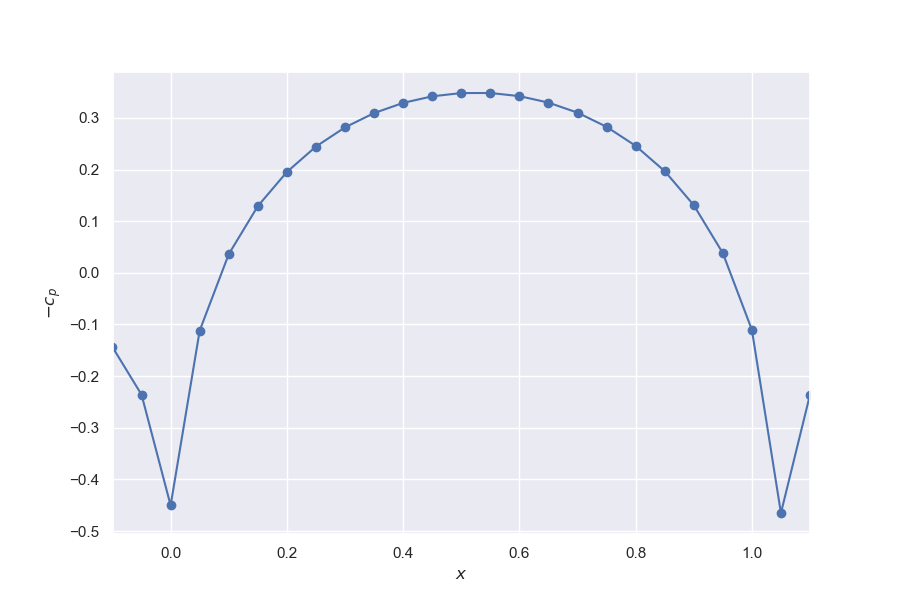

Text(0, 0.5, '$-c_p$')

In [5]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(mesh.x, -flow.cp[:,2], marker='o')

ax.set_xlim((-0.1,1.1))
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$-c_p$', fontsize=12)

<IPython.core.display.Javascript object>


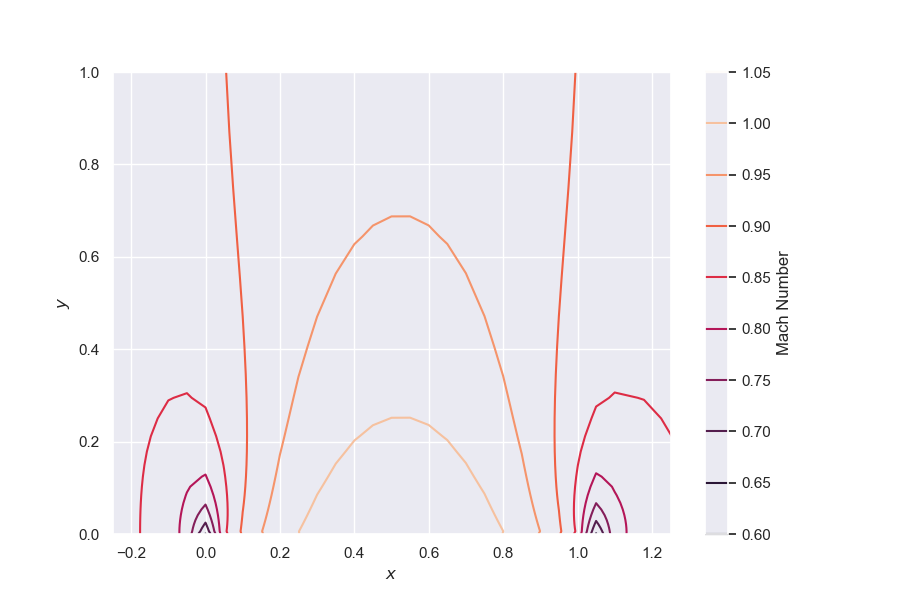

Text(0, 0.5, '$y$')

In [6]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

CS = plt.contour(flow.X, flow.Y, flow.M)#, levels=[0.8,  0.9, 1.0, 1.1, 1.2 ], colors=['y', 'b', 'r', 'g','k'])

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Mach Number')

ax.minorticks_on()

ax.set_xlim((-0.25,1.25))
ax.set_ylim((0,1))

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)

<IPython.core.display.Javascript object>


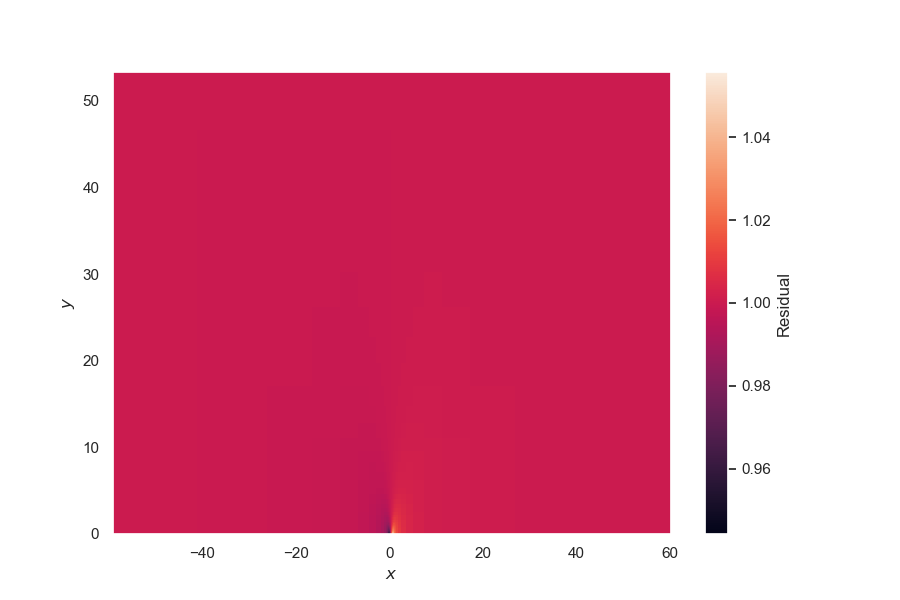

/var/folders/b_/pfp74yh957398t17tw7cby8h0000gr/T/ipykernel_9719/231632551.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  CS = plt.pcolor(flow.X, flow.Y, flow.phi)#, levels=[0.8,  0.9, 1.0, 1.1, 1.2 ], colors=['y', 'b', 'r', 'g','k'])
/var/folders/b_/pfp74yh957398t17tw7cby8h0000gr/T/ipykernel_9719/231632551.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


Text(0, 0.5, '$y$')

In [7]:

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

CS = plt.pcolor(flow.X, flow.Y, flow.phi)#, levels=[0.8,  0.9, 1.0, 1.1, 1.2 ], colors=['y', 'b', 'r', 'g','k'])

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Residual')

ax.minorticks_on()

# ax.set_xlim((-0.25,1.25))
# ax.set_ylim((0,0.1))

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)